# Analysing simulation results

With `micromagneticdata` we can analyse simulation results created with `oommfc`. This notebook summarises the available functionality.

In [1]:
import os

import micromagneticdata as md

We have a set of example simulations stored in the test directory of `micromagneticdata` that we use to demonstrate its functionality.

In [2]:
dirname = os.path.join("..", "micromagneticdata", "tests", "test_sample")

## `Data`
First, we creata a `Data` object. We need to pass the name of the `micromagneticmodel.System` that we used to run the simulation and optionally an additional path to the base directory.

In [3]:
data = md.Data(name="rectangle", dirname=dirname)

The `Data` object contains all simulation runs of the `System`. These are called drives.

In [4]:
data.n

7

In [5]:
data.info

,drive_number,date,time,driver,adapter,t,n,n_threads
0,0,2024-06-11,14:14:32,TimeDriver,oommfc,2.500000e-11,25.0,NaN
1,1,2024-06-11,14:14:39,TimeDriver,mumax3c,1.500000e-11,15.0,NaN
2,2,2024-06-11,14:14:39,TimeDriver,mumax3c,5.000000e-10,250.0,NaN
3,3,2024-06-11,14:14:41,RelaxDriver,mumax3c,NaN,NaN,NaN
4,4,2024-06-11,14:14:42,MinDriver,mumax3c,NaN,NaN,NaN
5,5,2024-06-11,14:14:42,TimeDriver,oommfc,5.000000e-12,5.0,NaN
6,6,2024-06-11,14:14:49,MinDriver,oommfc,NaN,NaN,NaN


## `Drive`
To access one `Drive` we can index the `Data` object.

In [6]:
drive = data[6]

The `Drive` object has a number of properties containing information about the drive.

In [7]:
drive.n

14

In [8]:
drive.info

{'drive_number': 6,
 'date': '2024-06-11',
 'time': '14:14:49',
 'driver': 'MinDriver',
 'adapter': 'oommfc',
 'n_threads': None}

In [9]:
drive = data[6]

In [10]:
drive.x

'iteration'

In [11]:
drive.info

{'drive_number': 6,
 'date': '2024-06-11',
 'time': '14:14:49',
 'driver': 'MinDriver',
 'adapter': 'oommfc',
 'n_threads': None}

In [12]:
print(drive.calculator_script)

# MIF 2.2

SetOptions {
  basename rectangle
  scalar_output_format %.12g
  scalar_field_output_format {binary 8}
  vector_field_output_format {binary 8}
}

# BoxAtlas for total_atlas
Specify Oxs_BoxAtlas:total_atlas {
  xrange { -5e-08 5e-08 }
  yrange { -2.5e-08 2.5e-08 }
  zrange { 0.0 2e-08 }
  name total
}

# BoxAtlas for entire_atlas
Specify Oxs_BoxAtlas:entire_atlas {
  xrange { -5e-08 5e-08 }
  yrange { -2.5e-08 2.5e-08 }
  zrange { 0.0 2e-08 }
  name entire
}

# MultiAtlas
Specify Oxs_MultiAtlas:main_atlas {
  atlas :total_atlas
  atlas :entire_atlas
  xrange { -5e-08 5e-08 }
  yrange { -2.5e-08 2.5e-08 }
  zrange { 0.0 2e-08 }
}

# RectangularMesh
Specify Oxs_RectangularMesh:mesh {
  cellsize { 5e-09 5e-09 5e-09 }
  atlas :main_atlas
}

# UniformExchange
Specify Oxs_UniformExchange:exchange {
  A 1.3e-11
}

# FixedZeeman
Specify Oxs_FixedZeeman:zeeman {
  field {0.0 0.0 1000000.0}
}

# m0 file
Specify Oxs_FileVectorField:m0 {
  file m0.omf
  atlas :main_atlas
}

# m0_norm
Spe

The initial magnetisation can be obtained with `m0`. It returns a `discretisedfield.Field` object.

In [13]:
drive.m0

Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=None)

Scalar data of the drive can be accessed via the `table` property that returns a `ubermagtable.Table` object.

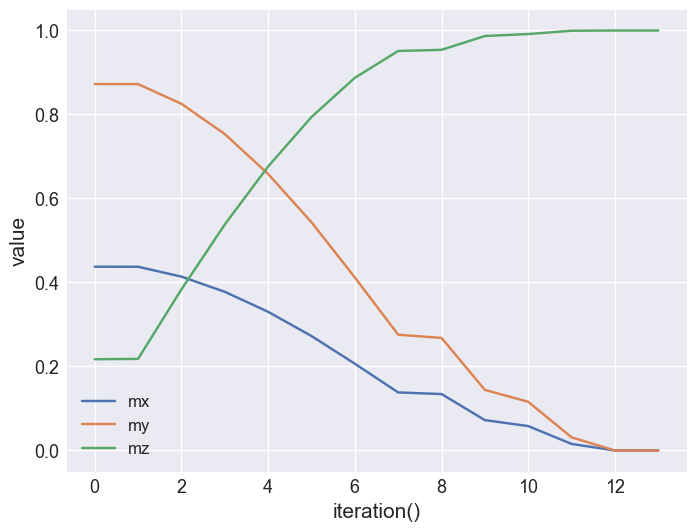

In [14]:
drive.table.mpl(y=["mx", "my", "mz"])

In [15]:
drive.n

14

We can access the magnetisation at a single step or iterate over the drive.

In [16]:
drive[0]

Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=A/m)

In [17]:
list(drive)

[Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=A/m),
 Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=A/m),
 Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=A/m),
 Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08,

We can also select a parts of the data and get a new drive, e.g. every second of the first 10 elements.

In [18]:
drive_selection = drive[:10:2]
drive_selection

OOMMFDrive(name='rectangle', number=6, dirname='../micromagneticdata/tests/test_sample', x='iteration')

In [19]:
drive_selection.n

5

It is possible to convert all magnetisation files into vtk for visualisation e.g. in Paraview.

In [20]:
# drive.ovf2vtk()

We can convert a drive into an `xarray.DataArray`. An additional dimension is added depending on the type of drive.

In [21]:
drive.to_xarray()

<xarray.DataArray 'field' (iteration: 14, x: 20, y: 10, z: 4, vdims: 3)> Size: 269kB
array([[[[[ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05]],

         [[ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05]],

         [[ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05]],

         ...,

         [[ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
          [ 3.50067876e+05,  6.98022376e+05,  1.73831082e+05],
...
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05]],

         ...,

         [[-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05]],

         [[-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05]],

         [[-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05],
          [-3.41568167e-06, -6.81074074e-06,  8.00000000e+05]]]]])
Coordinates:
  * x          (x) float64 160B -4.75e-08 -4.25e-08 ... 4.25e-08 4.75e-08
  * y          (y) float64 80B -2.25e-08 -1.75e-08 ... 1.75e-08 2.25e-08
  * z          (z) float64 32B 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * vdims      (vdims) <U1 12B 'x' 'y' 'z'
  * iteration  (iteration) float64 112B 0.0 1.0 2.0 3.0 ... 10.0 11.0 12.0 13.0
Attributes:
    drive_number:  6
    date:          2024-06-11
    time:          14:14:49
    driver:        MinDriver
    adapter:       oommfc
    n_threads:     None

## `CombinedDrive`

Multiple drives can be concatenated to create one "longer" drive. This can e.g. be convenient to analyse multiple consecutive time drives. Combining drives is done via the `<<` operator which appends the right-hand-side drive to the left-hand-side drive. It returns a new `CombinedDrive` object that behaves very similar to the `Drive` object.

In [22]:
combined = data[0] << data[1] << data[2]
combined

CombinedDrive(
  OOMMFDrive(name='rectangle', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Mumax3Drive(name='rectangle', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Mumax3Drive(name='rectangle', number=2, dirname='../micromagneticdata/tests/test_sample', x='t')
)

The combined drive has a property `drives` that provides a list of all individual drives.

In [23]:
combined.drives

(OOMMFDrive(name='rectangle', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
 Mumax3Drive(name='rectangle', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
 Mumax3Drive(name='rectangle', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'))

In [24]:
combined.info

{'drive_numbers': [0, 1, 2], 'driver': 'TimeDriver'}

We have direct access to the initial magnetisation of the first drive.

In [25]:
combined.m0

Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=None)

In [26]:
combined.n

290

The combined drive has one large table that contains the data for all individual drives.

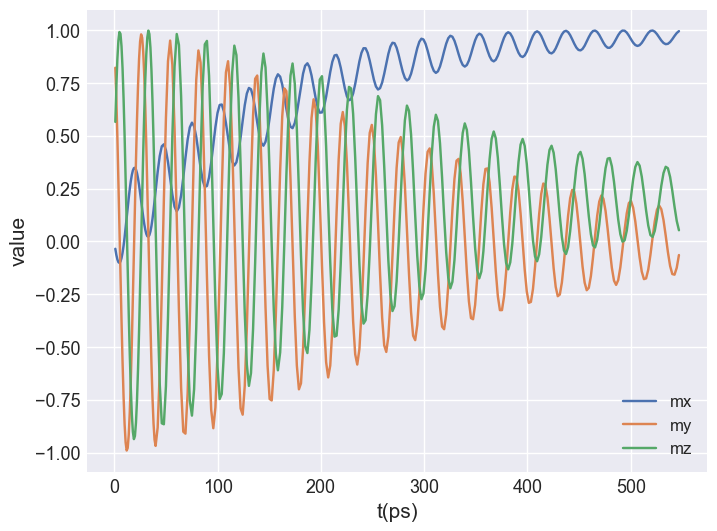

In [27]:
combined.table.mpl(y=["mx", "my", "mz"])

We can iterate over the drives in the combined drive or access a single element.

In [28]:
combined[15]

Field(Mesh(Region(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`total`(pmin=[-5e-08, -2.5e-08, 0.0], pmax=[5e-08, 2.5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']))), nvdim=3, vdims: (x, y, z), unit=A/m)

In [29]:
combined.x

't'

The combined drive can be converted into an `xarray.DataArray` similar to the normal `Drive`.

In [30]:
combined.to_xarray()

<xarray.DataArray 'field' (t: 290, x: 20, y: 10, z: 4, vdims: 3)> Size: 6MB
array([[[[[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874]],

         ...,

         [[ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
          [ -27584.49540021,  658579.77501927,  453334.06616874],
...
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125]],

         ...,

         [[ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125]],

         [[ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125]],

         [[ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125],
          [ 797212.875     ,  -51317.65625   ,   42639.36328125]]]]])
Coordinates:
  * x        (x) float64 160B -4.75e-08 -4.25e-08 ... 4.25e-08 4.75e-08
  * y        (y) float64 80B -2.25e-08 -1.75e-08 -1.25e-08 ... 1.75e-08 2.25e-08
  * z        (z) float64 32B 2.5e-09 7.5e-09 1.25e-08 1.75e-08
  * vdims    (vdims) <U1 12B 'x' 'y' 'z'
  * t        (t) float64 2kB 1e-12 2e-12 3e-12 ... 5.423e-10 5.445e-10 5.466e-10
Attributes:
    drive_numbers:  [0, 1, 2]
    driver:         TimeDriver

We can also append an other drive to a combined drive.

In [31]:
combined << data[0]

CombinedDrive(
  OOMMFDrive(name='rectangle', number=0, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Mumax3Drive(name='rectangle', number=1, dirname='../micromagneticdata/tests/test_sample', x='t'),
  Mumax3Drive(name='rectangle', number=2, dirname='../micromagneticdata/tests/test_sample', x='t'),
  OOMMFDrive(name='rectangle', number=0, dirname='../micromagneticdata/tests/test_sample', x='t')
)

## Widgets

In [32]:
data.selector()

BoundedIntText(value=0, description='drive', max=6)

In [33]:
drive.slider()

IntSlider(value=0, description='step', max=13)